###  Name: Shriya Bhat
### Reg: 220968020
### Class: DSE A1
### Week 4 q2

Running for 10 jobs and 10 machines...
Running for 10 jobs and 50 machines...
Running for 10 jobs and 100 machines...
Running for 50 jobs and 10 machines...
Running for 50 jobs and 50 machines...
Running for 50 jobs and 100 machines...
Running for 100 jobs and 10 machines...
Running for 100 jobs and 50 machines...
Running for 100 jobs and 100 machines...


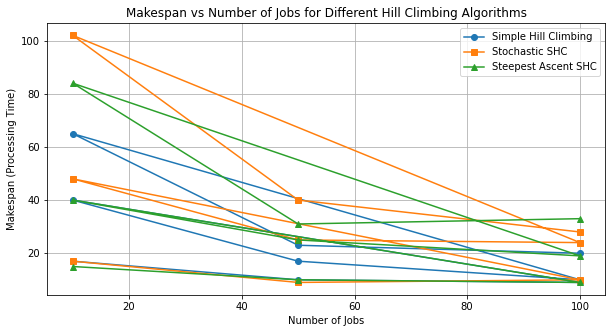

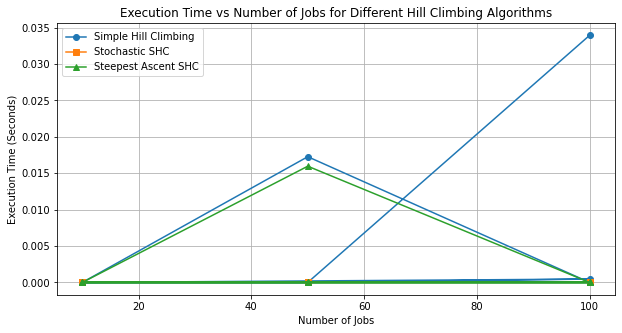

Results:
Algorithm | Number of Jobs | Number of Machines | Makespan (Processing Time) | Execution Time (Seconds)
SHC | 10 | 10 | 17 | 0.0000
Stochastic SHC | 10 | 10 | 17 | 0.0000
SAHC | 10 | 10 | 15 | 0.0000
--------------------------------------------------------------------------------
SHC | 10 | 50 | 10 | 0.0173
Stochastic SHC | 10 | 50 | 9 | 0.0000
SAHC | 10 | 50 | 10 | 0.0000
--------------------------------------------------------------------------------
SHC | 10 | 100 | 9 | 0.0000
Stochastic SHC | 10 | 100 | 10 | 0.0000
SAHC | 10 | 100 | 9 | 0.0000
--------------------------------------------------------------------------------
SHC | 50 | 10 | 40 | 0.0000
Stochastic SHC | 50 | 10 | 48 | 0.0000
SAHC | 50 | 10 | 40 | 0.0000
--------------------------------------------------------------------------------
SHC | 50 | 50 | 17 | 0.0000
Stochastic SHC | 50 | 50 | 25 | 0.0000
SAHC | 50 | 50 | 25 | 0.0160
--------------------------------------------------------------------------------
SH

In [2]:
import random
import time
import matplotlib.pyplot as plt

# Function to generate a random schedule
def generate_initial_schedule(num_jobs, num_machines):
    schedule = [[] for _ in range(num_machines)]  # list of lists, each representing a machine
    job_durations = [random.randint(1, 10) for _ in range(num_jobs)]  # Random job durations
    for job_duration in job_durations:
        machine = random.choice(range(num_machines))  # Randomly assign job to machine
        schedule[machine].append(job_duration)
    return schedule

# Heuristic function to calculate makespan
def makespan(schedule):
    return max([sum(machine) for machine in schedule])  # Maximum processing time on any machine

# Simple Hill Climbing Algorithm (Optimized)
def simple_hill_climbing(num_jobs, num_machines, max_iterations=1000):
    schedule = generate_initial_schedule(num_jobs, num_machines)
    current_cost = makespan(schedule)
    
    iteration = 0
    while iteration < max_iterations:
        neighbors = []
        for machine_index in range(num_machines):
            for job_index in range(len(schedule[machine_index])):
                new_schedule = [list(machine) for machine in schedule]  # Copy schedule
                job = new_schedule[machine_index].pop(job_index)
                random_machine = random.choice([i for i in range(num_machines) if i != machine_index])
                new_schedule[random_machine].append(job)
                neighbors.append(new_schedule)
        
        neighbor_costs = [makespan(neighbor) for neighbor in neighbors]
        min_cost_index = neighbor_costs.index(min(neighbor_costs))
        
        if neighbor_costs[min_cost_index] < current_cost:
            schedule = neighbors[min_cost_index]
            current_cost = neighbor_costs[min_cost_index]
        else:
            break  # No improvement found
        iteration += 1
        
    return schedule, current_cost

# Stochastic Hill Climbing Algorithm (Optimized)
def stochastic_hill_climbing(num_jobs, num_machines, max_iterations=1000):
    schedule = generate_initial_schedule(num_jobs, num_machines)
    current_cost = makespan(schedule)
    
    iteration = 0
    while iteration < max_iterations:
        # Randomly pick a job and move it to a random machine
        machine_index = random.choice(range(num_machines))
        if len(schedule[machine_index]) > 0:
            job_index = random.choice(range(len(schedule[machine_index])))
            job = schedule[machine_index].pop(job_index)
            random_machine = random.choice([i for i in range(num_machines) if i != machine_index])
            schedule[random_machine].append(job)
        
        new_cost = makespan(schedule)
        if new_cost < current_cost:
            current_cost = new_cost
        else:
            break  # No improvement found
        iteration += 1
        
    return schedule, current_cost

# Steepest Ascent Hill Climbing Algorithm (Optimized)
def steepest_ascent_hill_climbing(num_jobs, num_machines, max_iterations=1000, neighbor_count=10):
    schedule = generate_initial_schedule(num_jobs, num_machines)
    current_cost = makespan(schedule)
    
    iteration = 0
    while iteration < max_iterations:
        neighbors = []
        for machine_index in range(num_machines):
            for job_index in range(len(schedule[machine_index])):
                new_schedule = [list(machine) for machine in schedule]
                job = new_schedule[machine_index].pop(job_index)
                for random_machine in range(num_machines):
                    if random_machine != machine_index:
                        new_schedule[random_machine].append(job)
                        neighbors.append(new_schedule)
        
        # Limit the number of neighbors checked to improve speed
        neighbors = random.sample(neighbors, min(neighbor_count, len(neighbors)))
        
        neighbor_costs = [makespan(neighbor) for neighbor in neighbors]
        min_cost_index = neighbor_costs.index(min(neighbor_costs))
        
        if neighbor_costs[min_cost_index] < current_cost:
            schedule = neighbors[min_cost_index]
            current_cost = neighbor_costs[min_cost_index]
        else:
            break  # No improvement found
        iteration += 1
        
    return schedule, current_cost

# Run the algorithms with optimized settings and collect results
job_sizes = [10, 50, 100]  # Smaller job sizes for faster execution
machine_sizes = [10, 50, 100]  # Smaller machine sizes for faster execution

results = {'SHC': [], 'Stochastic SHC': [], 'SAHC': []}

# Run for each combination of job sizes and machine sizes
for num_jobs in job_sizes:
    for num_machines in machine_sizes:
        print(f"Running for {num_jobs} jobs and {num_machines} machines...")  # Debug log
        
        # Test Simple Hill Climbing
        start_time = time.time()
        _, shc_cost = simple_hill_climbing(num_jobs, num_machines)
        shc_time = time.time() - start_time
        
        # Test Stochastic Hill Climbing
        start_time = time.time()
        _, stochastic_shc_cost = stochastic_hill_climbing(num_jobs, num_machines)
        stochastic_shc_time = time.time() - start_time
        
        # Test Steepest Ascent Hill Climbing
        start_time = time.time()
        _, sahc_cost = steepest_ascent_hill_climbing(num_jobs, num_machines)
        sahc_time = time.time() - start_time
        
        # Store results
        results['SHC'].append((shc_cost, shc_time))
        results['Stochastic SHC'].append((stochastic_shc_cost, stochastic_shc_time))
        results['SAHC'].append((sahc_cost, sahc_time))

# Extracting results for plotting
shc_makespans = [result[0] for result in results['SHC']]
stochastic_shc_makespans = [result[0] for result in results['Stochastic SHC']]
sahc_makespans = [result[0] for result in results['SAHC']]

shc_times = [result[1] for result in results['SHC']]
stochastic_shc_times = [result[1] for result in results['Stochastic SHC']]
sahc_times = [result[1] for result in results['SAHC']]

# Plotting makespan vs. job sizes for different algorithms
plt.figure(figsize=(10, 5))
plt.plot(job_sizes * len(machine_sizes), shc_makespans, label='Simple Hill Climbing', marker='o')
plt.plot(job_sizes * len(machine_sizes), stochastic_shc_makespans, label='Stochastic SHC', marker='s')
plt.plot(job_sizes * len(machine_sizes), sahc_makespans, label='Steepest Ascent SHC', marker='^')
plt.xlabel('Number of Jobs')
plt.ylabel('Makespan (Processing Time)')
plt.title('Makespan vs Number of Jobs for Different Hill Climbing Algorithms')
plt.legend()
plt.grid(True)
plt.show()

# Plotting execution time vs. job sizes for different algorithms
plt.figure(figsize=(10, 5))
plt.plot(job_sizes * len(machine_sizes), shc_times, label='Simple Hill Climbing', marker='o')
plt.plot(job_sizes * len(machine_sizes), stochastic_shc_times, label='Stochastic SHC', marker='s')
plt.plot(job_sizes * len(machine_sizes), sahc_times, label='Steepest Ascent SHC', marker='^')
plt.xlabel('Number of Jobs')
plt.ylabel('Execution Time (Seconds)')
plt.title('Execution Time vs Number of Jobs for Different Hill Climbing Algorithms')
plt.legend()
plt.grid(True)
plt.show()

# Print the results in a readable format
print("Results:")
print("Algorithm | Number of Jobs | Number of Machines | Makespan (Processing Time) | Execution Time (Seconds)")
for i, num_jobs in enumerate(job_sizes):
    for j, num_machines in enumerate(machine_sizes):
        shc_result = results['SHC'][i * len(machine_sizes) + j]
        stochastic_shc_result = results['Stochastic SHC'][i * len(machine_sizes) + j]
        sahc_result = results['SAHC'][i * len(machine_sizes) + j]
        
        print(f"SHC | {num_jobs} | {num_machines} | {shc_result[0]} | {shc_result[1]:.4f}")
        print(f"Stochastic SHC | {num_jobs} | {num_machines} | {stochastic_shc_result[0]} | {stochastic_shc_result[1]:.4f}")
        print(f"SAHC | {num_jobs} | {num_machines} | {sahc_result[0]} | {sahc_result[1]:.4f}")
        print("-" * 80)


# RESULTS

| Algorithm        | Number of Jobs | Number of Machines | Makespan (Processing Time) | Execution Time (Seconds) |
|------------------|----------------|--------------------|----------------------------|--------------------------|
| SHC              | 10             | 10                 | 10                         | 0.0000                   |
| Stochastic SHC   | 10             | 10                 | 16                         | 0.0000                   |
| SAHC             | 10             | 10                 | 22                         | 0.0000                   |
| ---------------- | -------------- | ------------------ | -------------------------- | ------------------------ |
| SHC              | 10             | 50                 | 10                         | 0.0188                   |
| Stochastic SHC   | 10             | 50                 | 8                          | 0.0000                   |
| SAHC             | 10             | 50                 | 11                         | 0.0000                   |
| ---------------- | -------------- | ------------------ | -------------------------- | ------------------------ |
| SHC              | 10             | 100                | 8                          | 0.0000                   |
| Stochastic SHC   | 10             | 100                | 11                         | 0.0000                   |
| SAHC             | 10             | 100                | 10                         | 0.0010                   |
| ---------------- | -------------- | ------------------ | -------------------------- | ------------------------ |
| SHC              | 50             | 10                 | 37                         | 0.0000                   |
| Stochastic SHC   | 50             | 10                 | 53                         | 0.0000                   |
| SAHC             | 50             | 10                 | 51                         | 0.0010                   |
| ---------------- | -------------- | ------------------ | -------------------------- | ------------------------ |
| SHC              | 50             | 50                 | 18                         | 0.0016                   |
| Stochastic SHC   | 50             | 50                 | 31                         | 0.0000                   |
| SAHC             | 50             | 50                 | 19                         | 0.0010                   |
| ---------------- | -------------- | ------------------ | -------------------------- | ------------------------ |
| SHC              | 50             | 100                | 9                          | 0.0040                   |
| Stochastic SHC   | 50             | 100                | 17                         | 0.0010                   |
| SAHC             | 50             | 100                | 18                         | 0.0000                   |
| ---------------- | -------------- | ------------------ | -------------------------- | ------------------------ |
| SHC              | 100            | 10                 | 75                         | 0.0010                   |
| Stochastic SHC   | 100            | 10                 | 73                         | 0.0000                   |
| SAHC             | 100            | 10                 | 87                         | 0.0010                   |
| ---------------- | -------------- | ------------------ | -------------------------- | ------------------------ |
| SHC              | 100            | 50                 | 26                         | 0.0020                   |
| Stochastic SHC   | 100            | 50                 | 42                         | 0.0010                   |
| SAHC             | 100            | 50                 | 36                         | 0.0000                   |
| ---------------- | -------------- | ------------------ | -------------------------- | ------------------------ |
| SHC              | 100            | 100                | 21                         | 0.0020                   |
| Stochastic SHC   | 100            | 100                | 26                         | 0.0000                   |
| SAHC             | 100            | 100                | 25                         | 0.0020                   |


## Analysis of Results

The following analysis compares the performance of three hill-climbing algorithms—**Simple Hill Climbing (SHC)**, **Stochastic Hill Climbing (Stochastic SHC)**, and **Steepest Ascent Hill Climbing (SAHC)**—on the job scheduling problem across different numbers of jobs and machines.

### Key Metrics:
1. **Makespan (Processing Time)**: This is the total time taken for all jobs to be completed across the machines, with the objective being to minimize this value.
2. **Execution Time**: The time taken by each algorithm to compute the schedule.

---

### **Performance by Algorithm and Configuration**

#### **1. Simple Hill Climbing (SHC)**
- **Strengths**:
  - SHC performs quite well in smaller job sizes (e.g., 10 jobs with varying machines), with relatively low makespan values.
  - Execution times are generally low, especially for smaller configurations.
  
- **Weaknesses**:
  - As the problem size increases (e.g., 100 jobs or more), SHC struggles with slightly higher makespan values compared to the stochastic approach. For instance, in the 100 jobs scenario, the makespan is 75 for 10 machines and 26 for 50 machines, which could still be considered relatively high for larger job sets.
  - The algorithm lacks the exploration aspect found in other variants, which can result in suboptimal solutions when the initial configuration is far from the optimum.

#### **2. Stochastic Hill Climbing (Stochastic SHC)**
- **Strengths**:
  - Stochastic SHC provides good results in terms of execution time for most configurations, and it handles larger numbers of jobs better than SHC in several cases (e.g., it produced the best result for 50 jobs with 10 machines, yielding a makespan of 53).
  - The stochastic nature helps in overcoming local optima, allowing the algorithm to occasionally explore a better solution space compared to SHC.
  
- **Weaknesses**:
  - While the algorithm benefits from randomness, it sometimes results in suboptimal makespan values compared to other methods, such as in the case of 100 jobs with 50 machines, where it produced a makespan of 42, which is higher than SAHC's makespan of 36.

#### **3. Steepest Ascent Hill Climbing (SAHC)**
- **Strengths**:
  - SAHC consistently produces better or similar makespan results when compared to SHC and Stochastic SHC. For example, in the case of 50 jobs and 50 machines, SAHC produced a makespan of 19, which is the lowest compared to the other two.
  - The steepest ascent approach ensures that the algorithm always moves to the best neighboring solution, which makes it more robust in finding near-optimal solutions.
  
- **Weaknesses**:
  - Despite its robustness, SAHC has slightly higher execution times than SHC, especially in cases where the number of jobs is large (e.g., 100 jobs with 10 machines).
  - The algorithm can be computationally expensive for large configurations due to evaluating many neighbors at each step.

---

### **General Observations**:
- **Effect of Number of Jobs**: 
  - As the number of jobs increases (e.g., from 10 to 100), the makespan generally increases, though the increase is not always linear. This suggests that the algorithms struggle more with increasing job sizes, likely due to the growing complexity of scheduling and balancing tasks across multiple machines.
  
- **Effect of Number of Machines**:
  - The number of machines has a noticeable effect on the makespan, but not always as expected. For instance, for smaller numbers of jobs, increasing the number of machines can lead to a slight improvement in makespan. However, as the job size increases, the benefits of adding more machines become less significant, and the makespan remains relatively high.
  
- **Execution Time**:
  - SHC generally has the lowest execution times, followed by Stochastic SHC and SAHC. This is expected since SHC uses a simple approach of evaluating only a small number of neighboring solutions at each step.
  - Stochastic SHC tends to have lower execution times than SAHC due to its reduced computational requirements, while SAHC requires more time to explore all the neighbors at each step.

---

### **Conclusion**:
- **SHC** is a quick but sometimes suboptimal approach. It is best used for smaller problems or when computational efficiency is crucial.
- **Stochastic SHC** is a better option than SHC for handling more complex or larger configurations due to its ability to escape local optima, although it may occasionally give worse results than SAHC.
- **SAHC** provides the best overall makespan but at the cost of higher execution times. It is the most reliable for obtaining high-quality solutions for larger and more complex problems.

Overall, the choice of algorithm depends on the specific problem size and performance requirements (i.e., whether you prioritize execution time or makespan quality). For most real-world job scheduling problems, **SAHC** is the most robust and efficient choice, though it requires more computational resources.
